# A caminhada aleatória

O problema da caminhada aleatória surge, de diversas formas, em estratégias para resolução de problemas utilizando métodos probabilísticos. A ideia geral é simular uma dinâmica acompanhando uma "partícula" que se move, de  forma "aleatória" num domínio. Geralmente estamos interessados em acompanhar as trajetórias ou os sítios do domínio que foram visitados pela partícula.

Vamos supor, por exemplo, que uma grade bidimensional, representada na forma de uma matriz, mapeia os cruzamentos das ruas de uma cidade. Um indivíduo sai de um destes cruzamentos e, escolhendo de forma aleatória em qual direção seguir vai de uma esquina a outra, sem sair da cidade. Qual a probabilidade deste indivíduo chegar a um determinado ponto da cidade? 

Esta é uma versão muito simplificada do problema conhecido como o "Andar do bêbado". Geralmente se trata de determinar alguma probabilidade, como no exemplo anterior, ou determinar quais as áreas com mais probabilidades de serem visitas (por quais esquinas o bêbado tem mais probabilidade de passar). Para estimar estes valores implementamos um algoritmo que realiza várias simulações, ou seja simula o percurso os percursos realizados por N indivíduos e conta quantos chegaram ao destino e/ou por quais esquinas passaram.  

Vamos fazer algumas simulações baseadas neste problema?

1. Suponha que a sua cidade é representada como uma matriz de 400 linhas por 400 colunas. Suponha também que o bar está localizado na posição i = 200 e j = 200 ( o bêbado sempre sai desta posição). Qual a probabilidade dele em casa sendo qu a mesma se encontra no canto superior esquerdo da matriz (i = 0, j = 0)? Mostre também, com um mapa de calor, as esquinas que tem maior probabilidade de serem visitadas pelo bêbado. A dinâmica do trajeto é a seguinte. 
* O bêbado sempre sai do bar escolhendo uma das quatro possíveis direciones, que o levará a uma esquina (up, down right or left).
* Toda vez que o bêbado chega numa esquina você precisa contar que a mesma foi visitada;
* Se a esquina visitada não for o destino final o bêbado escolhe uma nova direção para andar entre as quatro possíveis, o que levará a uma nova esquina.
* Toda vez que o bêbado chega numa borda as direções que o levariam a sair do domínio sào descartadas ( a cidade tem uma muralha a prova de bêbados).
* Após ter visitado 500 esquina e se ainda não tiver chegado em casa a simulação para e começamos uma nova; 
* Toda vez que o a simulação leve o bêbado até em casa, contabiliza uma chegada e começa uma nova simulação;
* Vamos escolher fazer 1000 simulações;
* Após concluídas as 1000 simulações calculamos a probabilidade como o número de chegadas em casa dividido por 1000;
* A matriz visualizada como uma imagem serve como mapa de calor para mostrar as esquinas mais visitadas. Como geramos esta visualização?



18


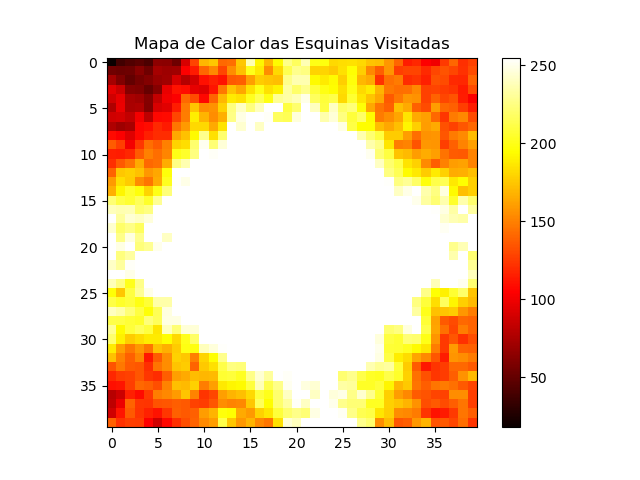

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

def simular_caminhada(n_simulacoes, n_esquinas, destino):
    chegadas_em_casa = 0
    visitas_por_esquina = np.zeros((n_esquinas, n_esquinas))

    for _ in range(n_simulacoes):
        posicao_atual = [n_esquinas/2, n_esquinas/2] #devve ser par o n_esquinas

        for _ in range(500):
            direcao = np.random.choice(['up', 'down', 'left', 'right'])
            
            if direcao == 'up' and posicao_atual[0] < n_esquinas - 1:
                posicao_atual[0] += 1
                #visitas_por_esquina[posicao_atual[0], posicao_atual[1]] += 1
            elif direcao == 'down' and posicao_atual[0] > 0:
                posicao_atual[0] -= 1
                #visitas_por_esquina[posicao_atual[0], posicao_atual[1]] += 1
            elif direcao == 'left' and posicao_atual[1] > 0:
                posicao_atual[1] -= 1
                #visitas_por_esquina[posicao_atual[0], posicao_atual[1]] += 1
            elif direcao == 'right' and posicao_atual[1] < n_esquinas - 1:
                posicao_atual[1] += 1
                #visitas_por_esquina[posicao_atual[0], posicao_atual[1]] += 1

            visitas_por_esquina[int(posicao_atual[0]), int(posicao_atual[1])] += 1
            #print(visitas_por_esquina)
            if posicao_atual == destino:
                chegadas_em_casa += 1
                break
            #print(chegadas_em_casa)

    probabilidade = chegadas_em_casa / n_simulacoes
    print(chegadas_em_casa)
    
    return probabilidade, visitas_por_esquina

def gerar_mapa_de_calor(matriz, titulo):
    plt.imshow(matriz, cmap='hot', interpolation='nearest', vmax=255)
    plt.title(titulo)
    plt.colorbar()
    plt.show()

# Parâmetros
n_simulacoes = 1000
n_esquinas = 40
destino = [0, 0]

# Simulação
probabilidade, visitas_por_esquina = simular_caminhada(n_simulacoes, n_esquinas, destino)

# Resultados
#print(f"Probabilidade de chegar em casa: {probabilidade}")
gerar_mapa_de_calor(visitas_por_esquina, "Mapa de Calor das Esquinas Visitadas")